In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [79]:
#libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# libraries for models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix

In [80]:
#READING DATA and saving in DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv"
header_names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"]
df = pd.read_csv(url, names=header_names)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [81]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


There is 214 data, 2 int Dtype, 8 float64 Dtype

<AxesSubplot: xlabel='Type of glass', ylabel='count'>

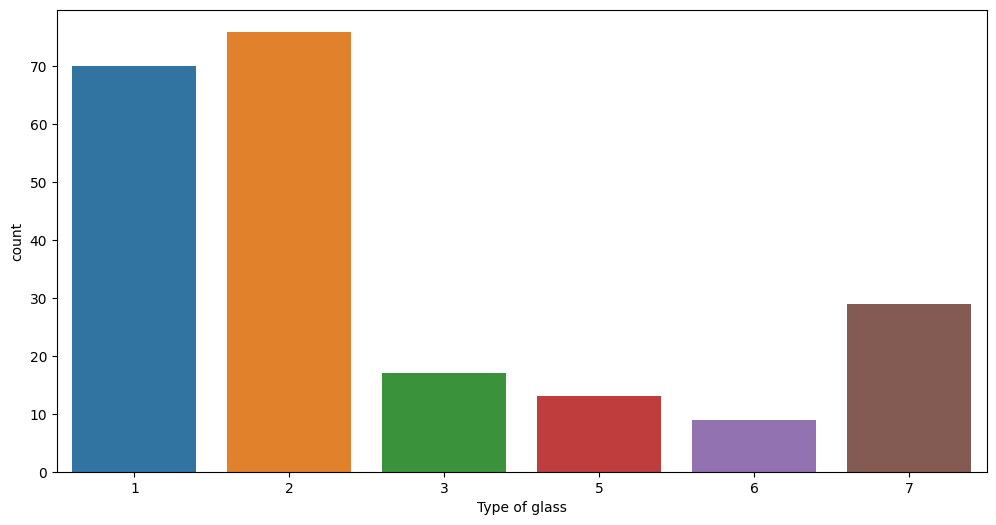

In [83]:
plt.figure(figsize=(12,6))
sns.countplot(x='Type of glass', data=df)

The data is imbalanced.

In [84]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The outliers are present in features K, Ca, Ba, and Fe.

In [85]:
#drop id, as it is of no use in prediction of type of glass
df = df.drop(columns=['Id'])

In [86]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

No nan are present in dataset.

In [87]:
df['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

It gives the category wise number of glasses. Below it is sorted .

In [88]:
df['Type of glass'].value_counts().sort_index(ascending=True)

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type of glass, dtype: int64

<AxesSubplot: >

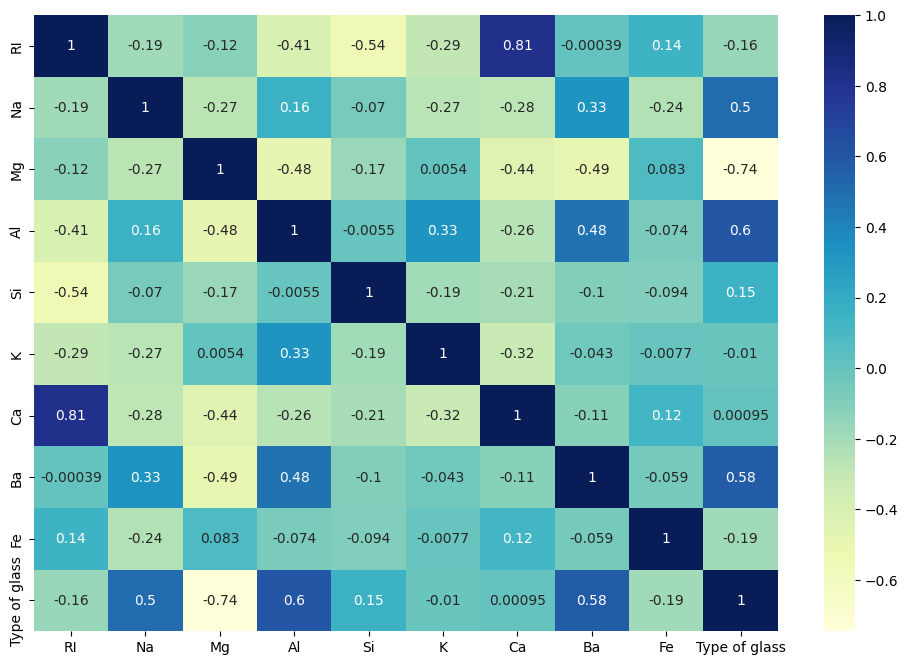

In [89]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

<Figure size 1500x1500 with 0 Axes>

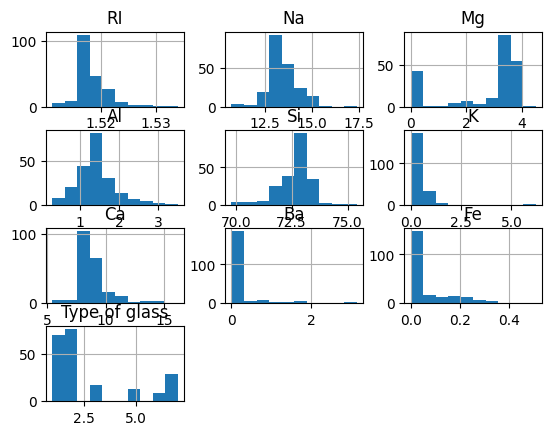

In [90]:
plt.figure(figsize=(15,15))
df.hist()
plt.show()

<Figure size 1200x800 with 0 Axes>

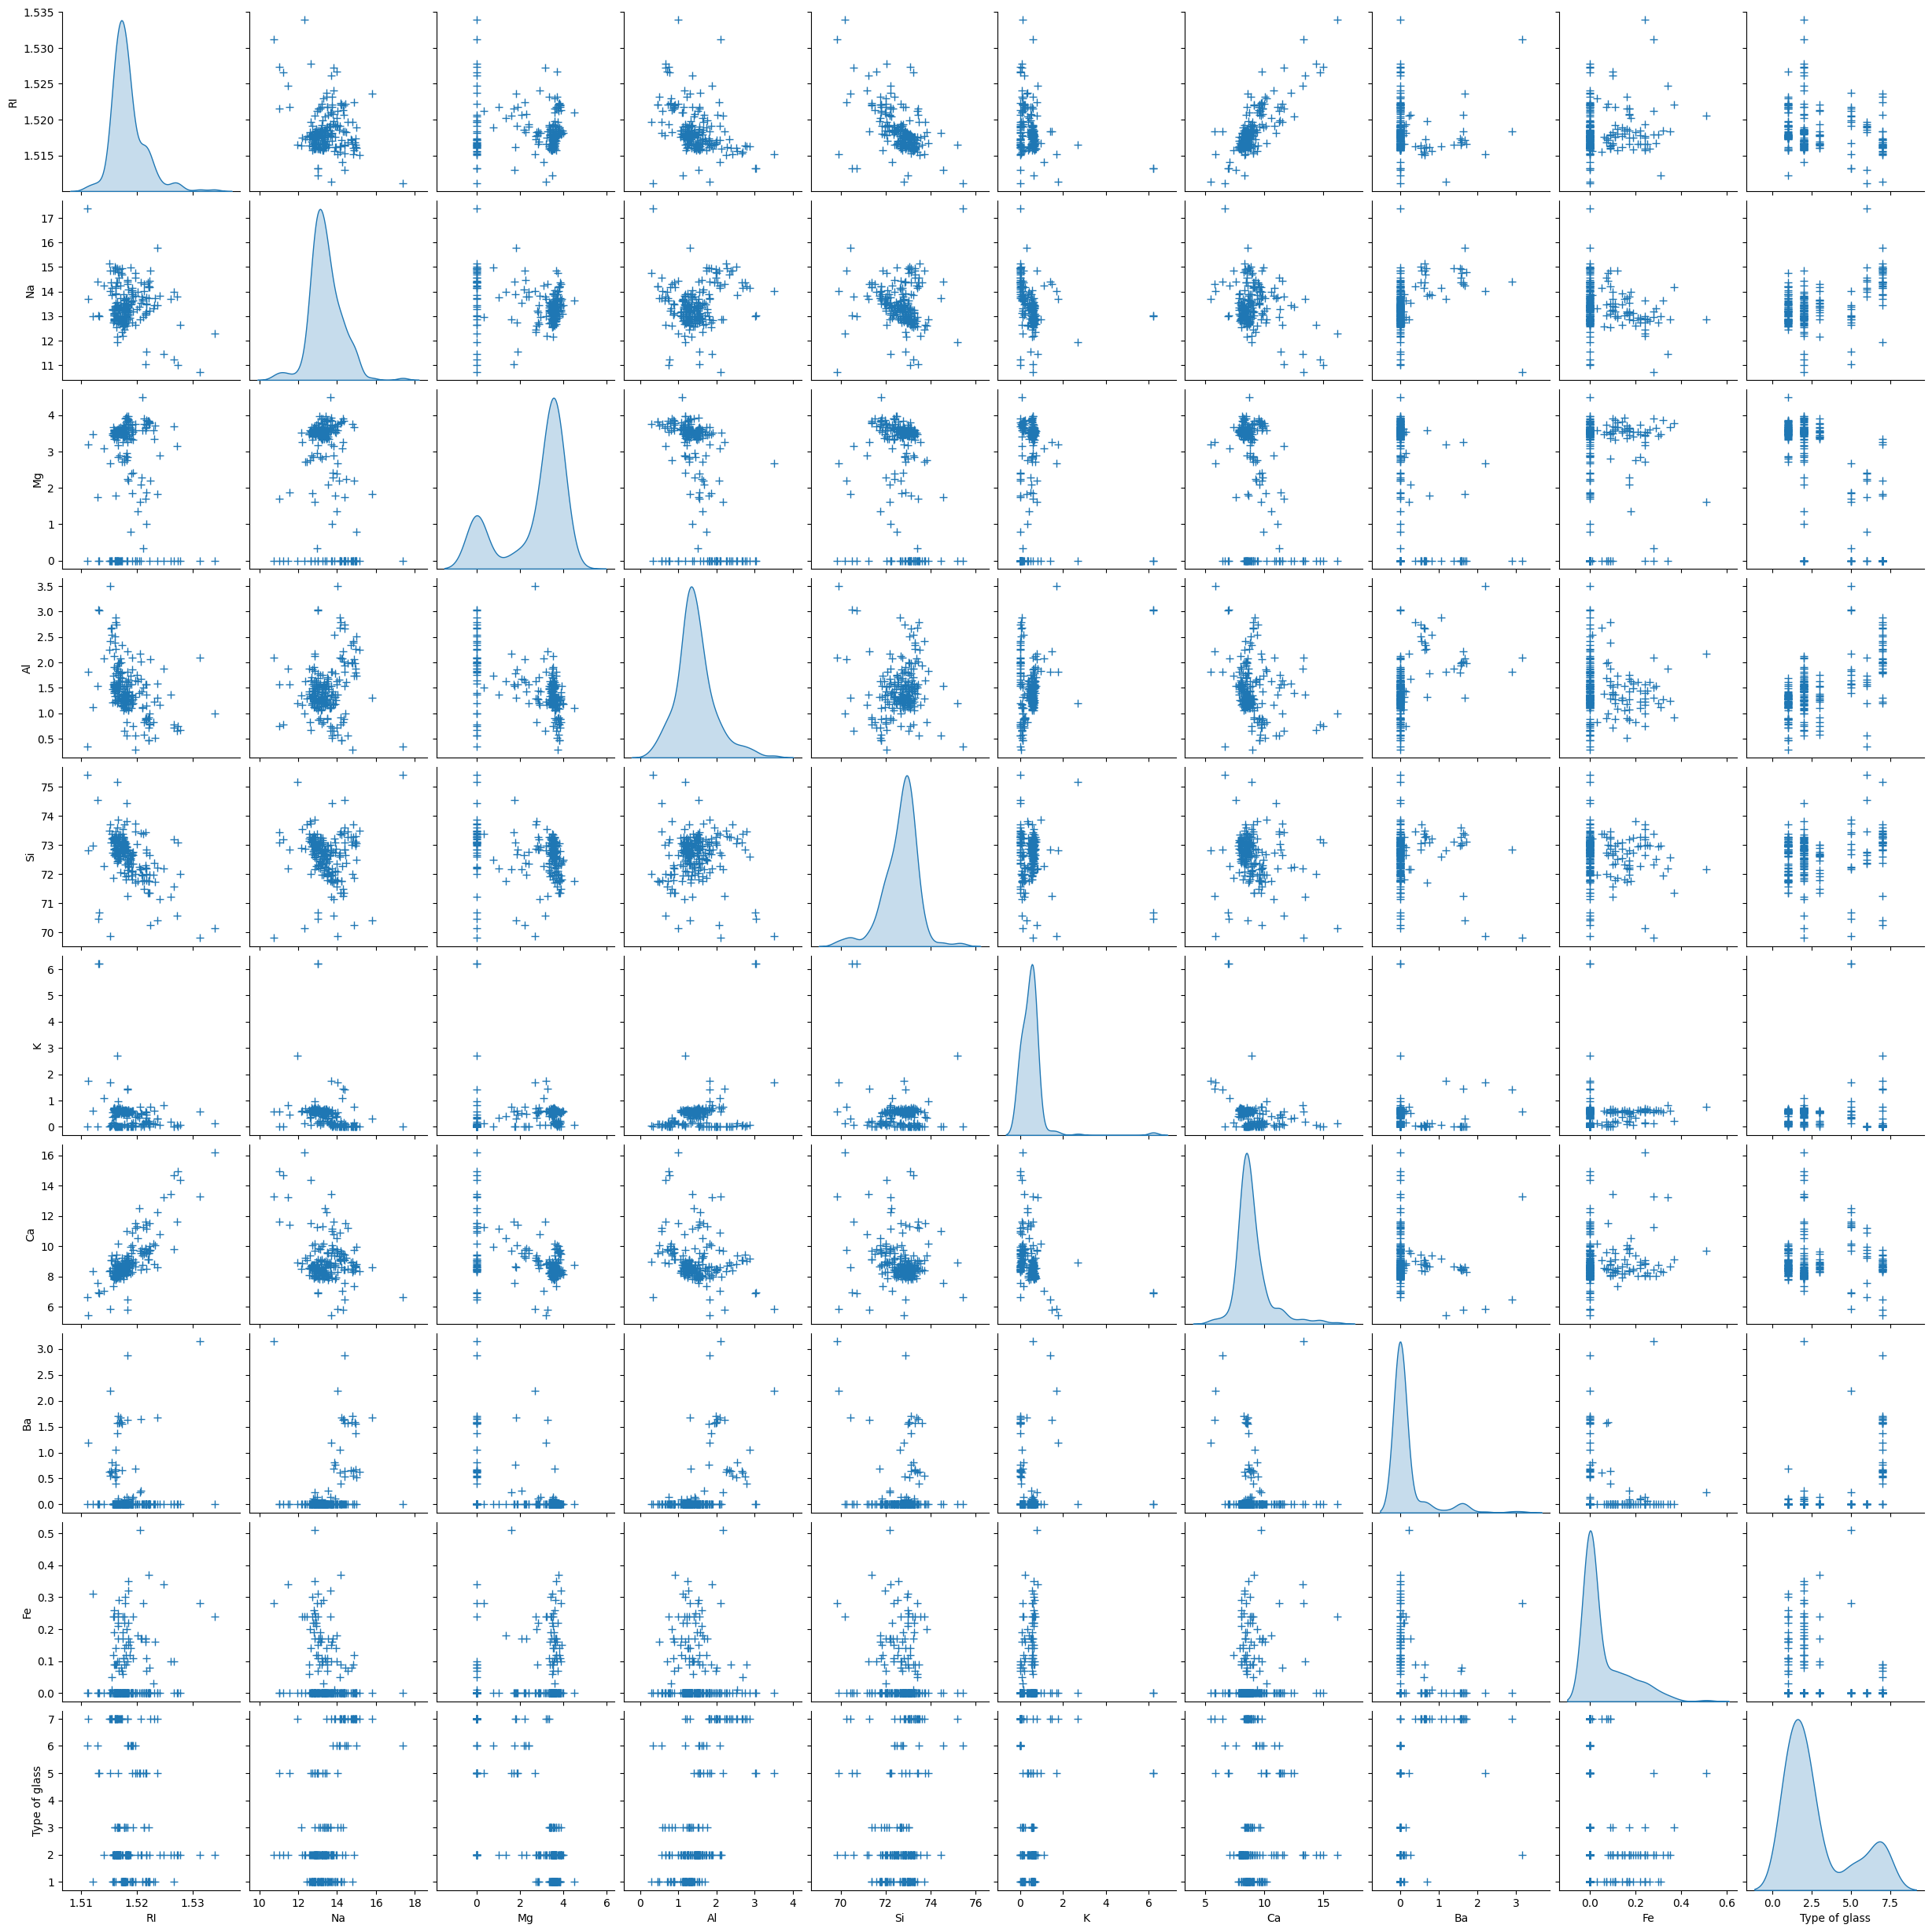

In [91]:
plt.figure(figsize=(12,8))
sns.pairplot(df, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

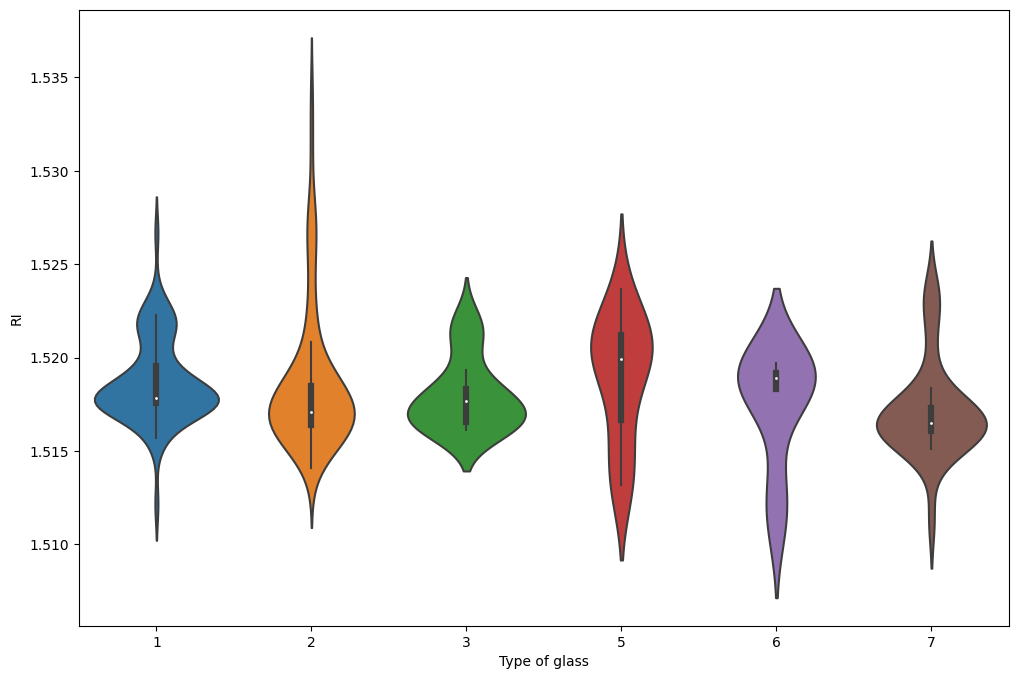

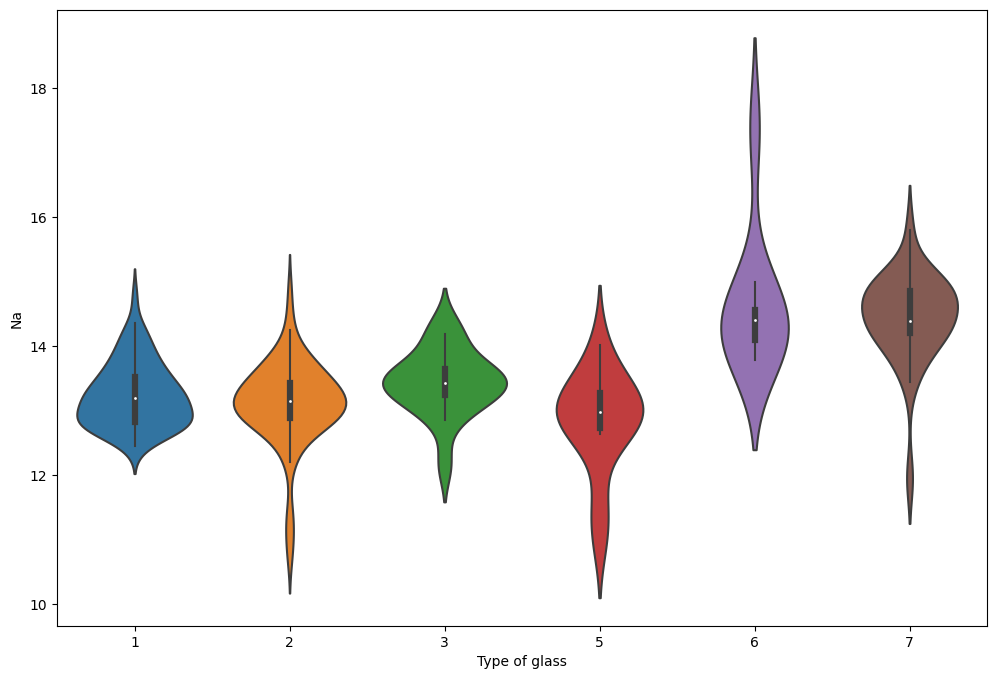

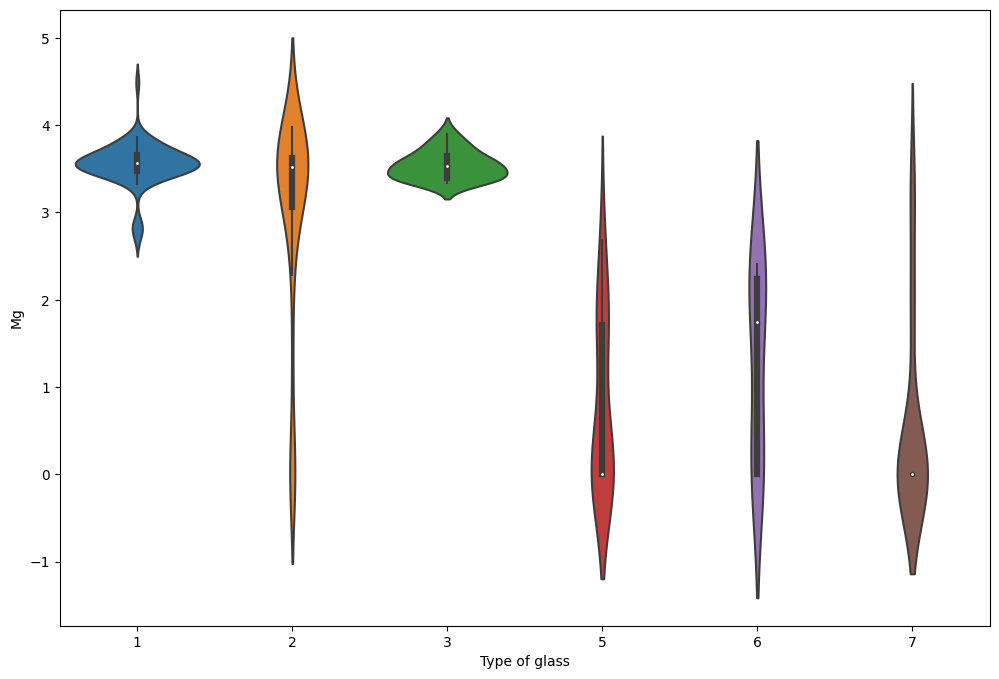

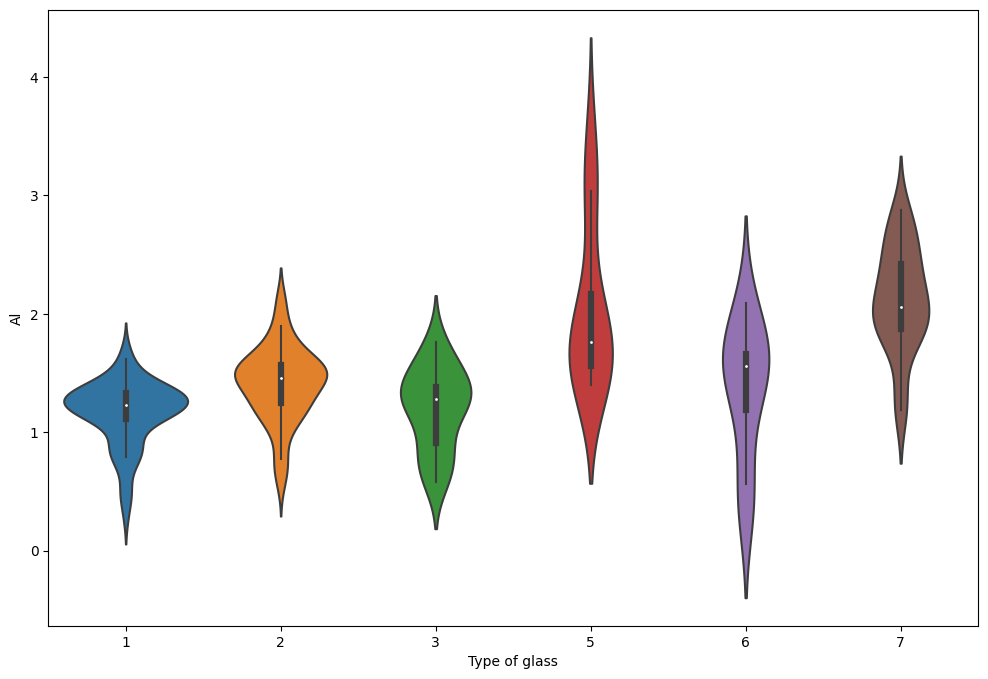

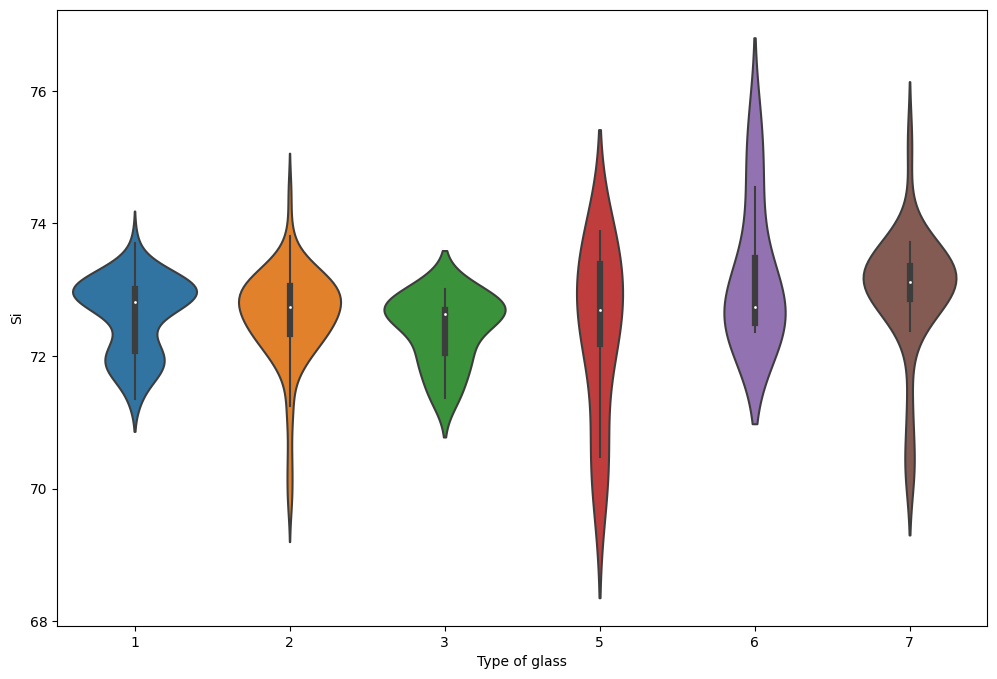

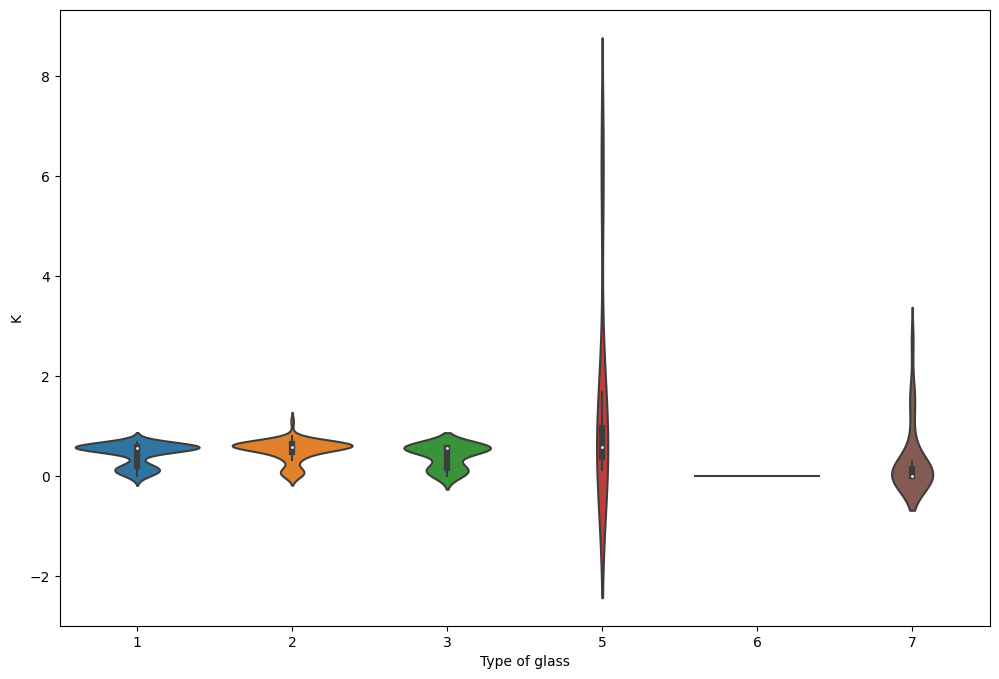

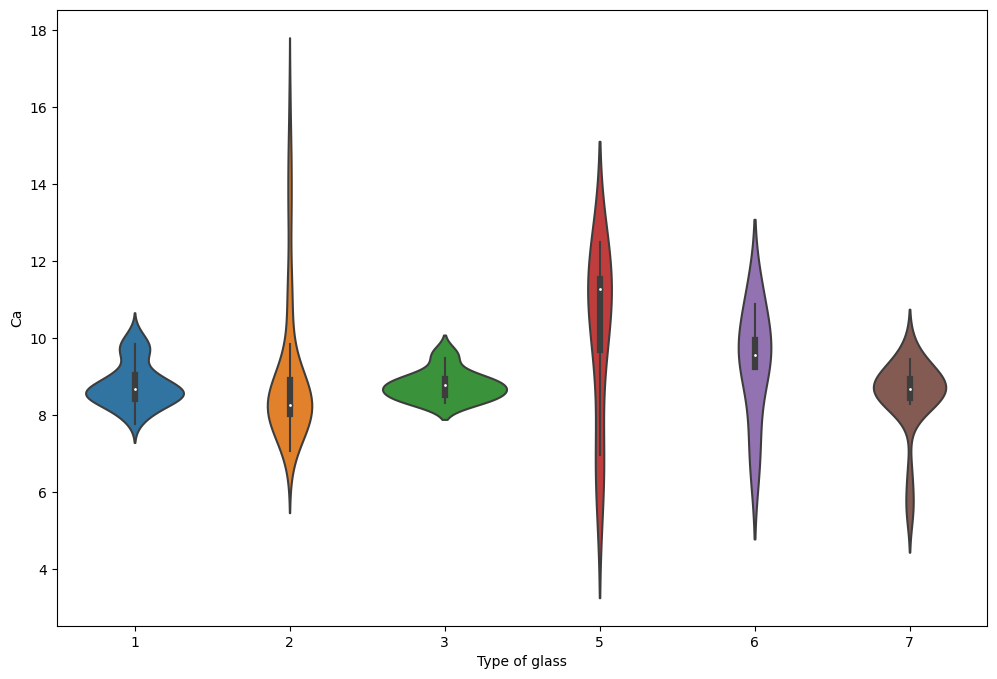

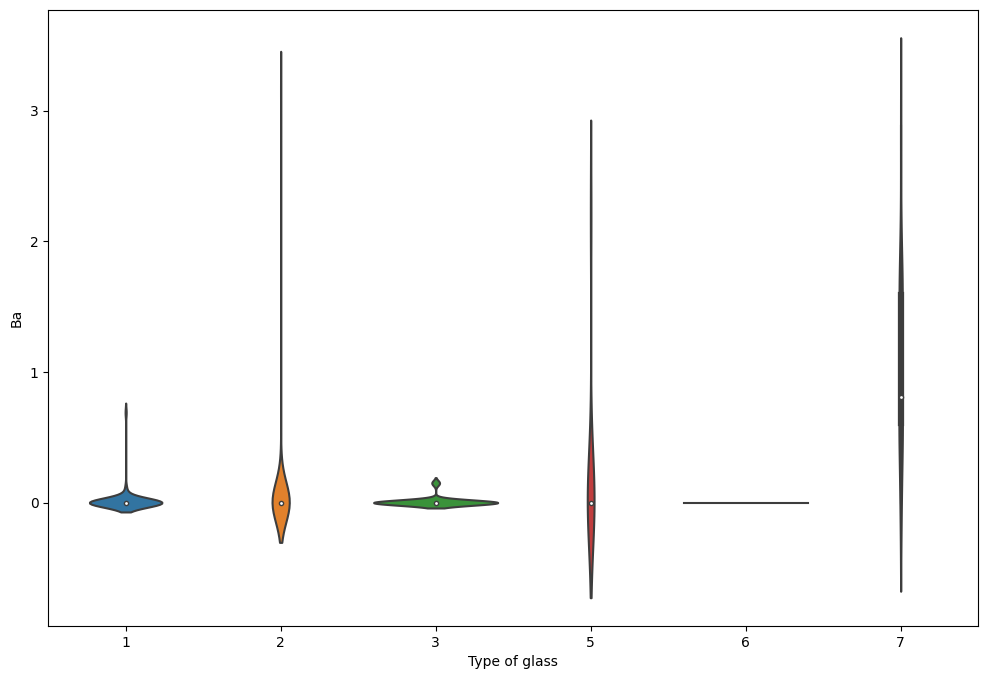

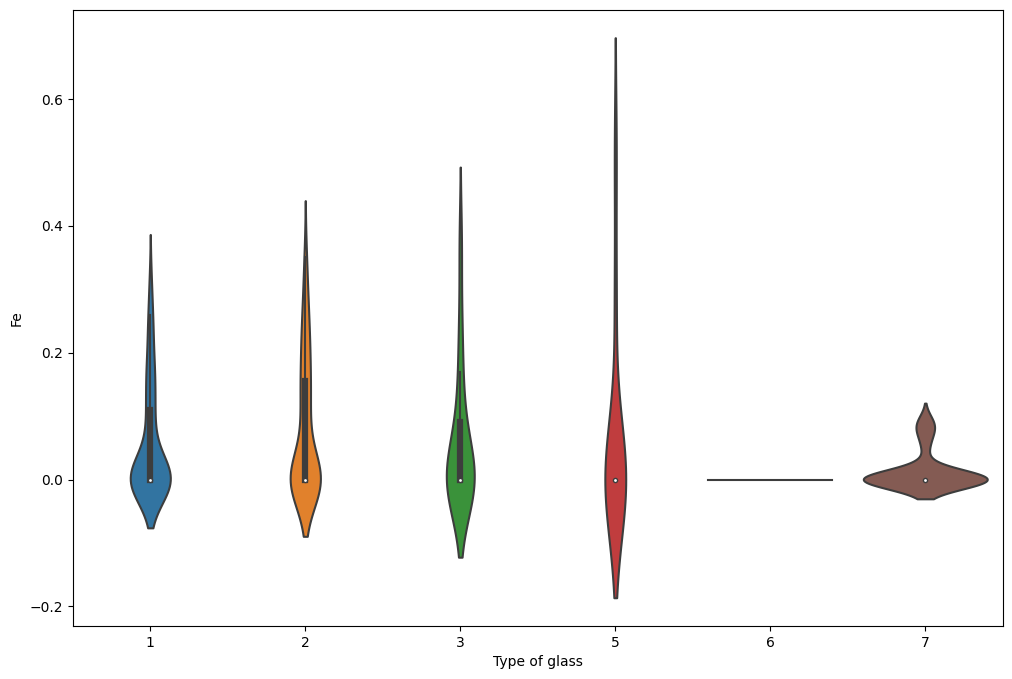

In [92]:
for column in df.columns:
    if column != "Type of glass":
        plt.figure(figsize=(12,8))
        ax = sns.violinplot(x="Type of glass", y=column, data=df)
        plt.show()

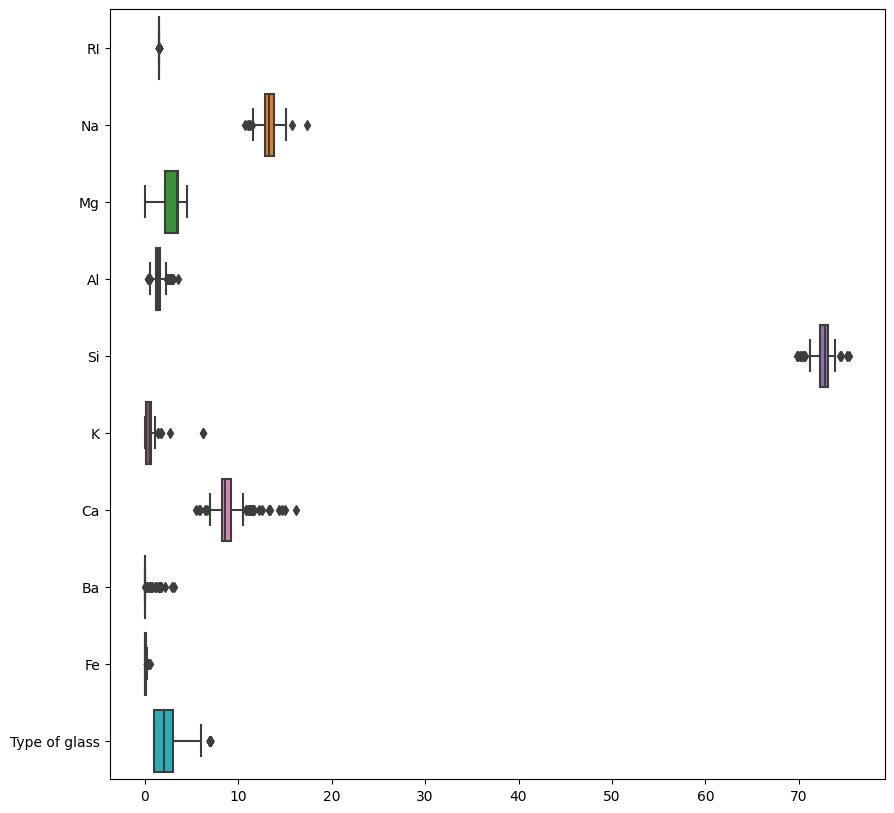

In [93]:
#outlier
plt.figure(figsize=(10,10))
sns.boxplot(data=df, orient="h");

As data is having free few rows so lets skip data cleaning, as data will be too less for training and building of a model.

In [94]:
# Create Classification version of target variable
df['Type'] = [1 if x >= 4 else 0 for x in df['Type of glass']]# Separate feature variables and target variable

In [95]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1


In [98]:
#Converting data to Balanced Data
from imblearn.over_sampling import SMOTE

x = df.drop(['Type of glass','Type'], axis=1)
y = df['Type']

In [99]:
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [100]:
# See proportion of non windoe glass vs window glass
y1.value_counts()

0    163
1    163
Name: Type, dtype: int64

In [101]:
# setting up testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.25, random_state=27)

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
#MODELLING (Importing Necessary libraries)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from catboost import CatBoostClassifier 

In [104]:
dt = DecisionTreeClassifier(random_state = 42)
svm = SVC(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
lr = LogisticRegression(random_state = 42)
ab=AdaBoostClassifier()
bc=BaggingClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()
ct=CatBoostClassifier()

In [105]:
# Define the list classifiers
classifiers = [
    ("dt" , dt),
    ("svm" , svm),
    ("rf" , rf),
    ("lr", lr),
    ("ab",ab),
    ("bc",bc),
    ("etc",etc),
    ("gbc",gbc),
    ("ct",ct)
    ]

In [106]:
# Dictionary to store accuracy and cross-validation scores
scores_dict = {}

for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, Y_train)
    
    # Predict y_pred
    Y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(Y_test, Y_pred)

    # Evaluate clf's accuracy on the test set
    print(f'{clf_name} score: {acc:.3f}')
    
    # Perform cross-validation and calculate the mean score
    cv_scores = cross_val_score(clf, X_train, Y_train, cv=5)
    mean_cv_score = cv_scores.mean()
    
    # Calculate the difference between accuracy and cross-validation score
    difference = acc - mean_cv_score
    
    # Store the results in the dictionary
    scores_dict[clf_name] = {
        'Accuracy': acc,
        'CrossValScores': cv_scores,
        'MeanCrossValScore': mean_cv_score,
        'Difference': difference
    }
    
    # Print the confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Print classification report
    report = classification_report(Y_test, Y_pred)
    print("Classification Report:")
    print(report)
    print()

# Print the results
for clf_name, results in scores_dict.items():
    print(f"{clf_name}:")
    print(f"Accuracy: {results['Accuracy']:.2f}")
    print("Cross-validation scores:", results['CrossValScores'])
    print(f"Mean Cross-validation score: {results['MeanCrossValScore']:.2f}")
    print(f"Difference between Accuracy and Cross-validation score: {results['Difference']:.2f}")
    print()


dt score: 0.951
Confusion Matrix:
[[43  1]
 [ 3 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.97      0.92      0.95        38

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82


svm score: 0.988
Confusion Matrix:
[[43  1]
 [ 0 38]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.97      1.00      0.99        38

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82


rf score: 0.988
Confusion Matrix:
[[44  0]
 [ 1 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
      

128:	learn: 0.1814786	total: 350ms	remaining: 2.36s
129:	learn: 0.1799808	total: 353ms	remaining: 2.36s
130:	learn: 0.1786531	total: 355ms	remaining: 2.35s
131:	learn: 0.1772765	total: 357ms	remaining: 2.35s
132:	learn: 0.1759290	total: 360ms	remaining: 2.34s
133:	learn: 0.1747919	total: 362ms	remaining: 2.34s
134:	learn: 0.1733394	total: 364ms	remaining: 2.33s
135:	learn: 0.1722180	total: 367ms	remaining: 2.33s
136:	learn: 0.1704167	total: 369ms	remaining: 2.32s
137:	learn: 0.1692982	total: 372ms	remaining: 2.32s
138:	learn: 0.1678891	total: 374ms	remaining: 2.32s
139:	learn: 0.1665554	total: 377ms	remaining: 2.31s
140:	learn: 0.1653056	total: 379ms	remaining: 2.31s
141:	learn: 0.1641526	total: 382ms	remaining: 2.31s
142:	learn: 0.1627923	total: 385ms	remaining: 2.31s
143:	learn: 0.1618424	total: 389ms	remaining: 2.31s
144:	learn: 0.1606588	total: 391ms	remaining: 2.3s
145:	learn: 0.1596251	total: 393ms	remaining: 2.3s
146:	learn: 0.1583643	total: 395ms	remaining: 2.29s
147:	learn: 0.

342:	learn: 0.0577810	total: 947ms	remaining: 1.81s
343:	learn: 0.0576311	total: 951ms	remaining: 1.81s
344:	learn: 0.0574069	total: 954ms	remaining: 1.81s
345:	learn: 0.0571806	total: 957ms	remaining: 1.81s
346:	learn: 0.0569145	total: 959ms	remaining: 1.8s
347:	learn: 0.0567611	total: 962ms	remaining: 1.8s
348:	learn: 0.0565229	total: 965ms	remaining: 1.8s
349:	learn: 0.0563072	total: 968ms	remaining: 1.8s
350:	learn: 0.0560955	total: 971ms	remaining: 1.79s
351:	learn: 0.0559108	total: 975ms	remaining: 1.79s
352:	learn: 0.0557023	total: 979ms	remaining: 1.79s
353:	learn: 0.0554615	total: 984ms	remaining: 1.79s
354:	learn: 0.0553035	total: 987ms	remaining: 1.79s
355:	learn: 0.0551731	total: 989ms	remaining: 1.79s
356:	learn: 0.0550153	total: 991ms	remaining: 1.78s
357:	learn: 0.0548163	total: 993ms	remaining: 1.78s
358:	learn: 0.0546573	total: 995ms	remaining: 1.78s
359:	learn: 0.0544105	total: 997ms	remaining: 1.77s
360:	learn: 0.0542544	total: 999ms	remaining: 1.77s
361:	learn: 0.05

566:	learn: 0.0302158	total: 1.52s	remaining: 1.17s
567:	learn: 0.0301386	total: 1.53s	remaining: 1.16s
568:	learn: 0.0300531	total: 1.53s	remaining: 1.16s
569:	learn: 0.0299945	total: 1.53s	remaining: 1.16s
570:	learn: 0.0299262	total: 1.54s	remaining: 1.16s
571:	learn: 0.0298370	total: 1.54s	remaining: 1.15s
572:	learn: 0.0297966	total: 1.54s	remaining: 1.15s
573:	learn: 0.0297300	total: 1.55s	remaining: 1.15s
574:	learn: 0.0296366	total: 1.55s	remaining: 1.15s
575:	learn: 0.0295954	total: 1.55s	remaining: 1.15s
576:	learn: 0.0295425	total: 1.56s	remaining: 1.14s
577:	learn: 0.0294227	total: 1.56s	remaining: 1.14s
578:	learn: 0.0293537	total: 1.57s	remaining: 1.14s
579:	learn: 0.0292824	total: 1.57s	remaining: 1.14s
580:	learn: 0.0292489	total: 1.57s	remaining: 1.13s
581:	learn: 0.0291823	total: 1.57s	remaining: 1.13s
582:	learn: 0.0291032	total: 1.57s	remaining: 1.13s
583:	learn: 0.0290208	total: 1.58s	remaining: 1.12s
584:	learn: 0.0289325	total: 1.58s	remaining: 1.12s
585:	learn: 

798:	learn: 0.0189230	total: 2.12s	remaining: 533ms
799:	learn: 0.0188936	total: 2.12s	remaining: 530ms
800:	learn: 0.0188637	total: 2.12s	remaining: 528ms
801:	learn: 0.0188369	total: 2.13s	remaining: 525ms
802:	learn: 0.0188066	total: 2.13s	remaining: 522ms
803:	learn: 0.0187662	total: 2.13s	remaining: 520ms
804:	learn: 0.0187420	total: 2.13s	remaining: 517ms
805:	learn: 0.0187016	total: 2.14s	remaining: 515ms
806:	learn: 0.0186728	total: 2.14s	remaining: 512ms
807:	learn: 0.0186484	total: 2.14s	remaining: 509ms
808:	learn: 0.0186228	total: 2.14s	remaining: 506ms
809:	learn: 0.0185837	total: 2.15s	remaining: 503ms
810:	learn: 0.0185541	total: 2.15s	remaining: 501ms
811:	learn: 0.0185341	total: 2.15s	remaining: 498ms
812:	learn: 0.0184953	total: 2.15s	remaining: 495ms
813:	learn: 0.0184615	total: 2.15s	remaining: 493ms
814:	learn: 0.0184328	total: 2.16s	remaining: 490ms
815:	learn: 0.0184058	total: 2.16s	remaining: 487ms
816:	learn: 0.0183766	total: 2.16s	remaining: 485ms
817:	learn: 

ct score: 0.976
Learning rate set to 0.005126
0:	learn: 0.6852483	total: 2.99ms	remaining: 2.99s
1:	learn: 0.6783682	total: 5.39ms	remaining: 2.69s
2:	learn: 0.6711343	total: 7.38ms	remaining: 2.45s
3:	learn: 0.6644955	total: 9.61ms	remaining: 2.39s
4:	learn: 0.6582888	total: 12.4ms	remaining: 2.47s
5:	learn: 0.6508576	total: 14.7ms	remaining: 2.43s
6:	learn: 0.6439371	total: 17ms	remaining: 2.41s
7:	learn: 0.6372334	total: 19.5ms	remaining: 2.42s
8:	learn: 0.6301140	total: 22ms	remaining: 2.42s
9:	learn: 0.6235219	total: 24.4ms	remaining: 2.42s
10:	learn: 0.6184528	total: 26.4ms	remaining: 2.37s
11:	learn: 0.6111907	total: 28.9ms	remaining: 2.38s
12:	learn: 0.6038721	total: 31.6ms	remaining: 2.4s
13:	learn: 0.5974817	total: 34.3ms	remaining: 2.42s
14:	learn: 0.5909021	total: 36.9ms	remaining: 2.42s
15:	learn: 0.5841895	total: 39.4ms	remaining: 2.42s
16:	learn: 0.5771993	total: 42.1ms	remaining: 2.43s
17:	learn: 0.5711529	total: 44.7ms	remaining: 2.44s
18:	learn: 0.5644868	total: 47.2m

217:	learn: 0.1246773	total: 552ms	remaining: 1.98s
218:	learn: 0.1239743	total: 556ms	remaining: 1.98s
219:	learn: 0.1232106	total: 559ms	remaining: 1.98s
220:	learn: 0.1228319	total: 561ms	remaining: 1.98s
221:	learn: 0.1223592	total: 563ms	remaining: 1.97s
222:	learn: 0.1219177	total: 565ms	remaining: 1.97s
223:	learn: 0.1211151	total: 567ms	remaining: 1.96s
224:	learn: 0.1207380	total: 569ms	remaining: 1.96s
225:	learn: 0.1201410	total: 572ms	remaining: 1.96s
226:	learn: 0.1196352	total: 574ms	remaining: 1.96s
227:	learn: 0.1190870	total: 577ms	remaining: 1.95s
228:	learn: 0.1186679	total: 579ms	remaining: 1.95s
229:	learn: 0.1180191	total: 582ms	remaining: 1.95s
230:	learn: 0.1175676	total: 584ms	remaining: 1.94s
231:	learn: 0.1169834	total: 587ms	remaining: 1.94s
232:	learn: 0.1161134	total: 589ms	remaining: 1.94s
233:	learn: 0.1156389	total: 593ms	remaining: 1.94s
234:	learn: 0.1152078	total: 595ms	remaining: 1.94s
235:	learn: 0.1145687	total: 597ms	remaining: 1.93s
236:	learn: 

382:	learn: 0.0636499	total: 942ms	remaining: 1.52s
383:	learn: 0.0634736	total: 945ms	remaining: 1.52s
384:	learn: 0.0632077	total: 948ms	remaining: 1.51s
385:	learn: 0.0629735	total: 951ms	remaining: 1.51s
386:	learn: 0.0627843	total: 953ms	remaining: 1.51s
387:	learn: 0.0626037	total: 956ms	remaining: 1.51s
388:	learn: 0.0623136	total: 959ms	remaining: 1.5s
389:	learn: 0.0621375	total: 962ms	remaining: 1.5s
390:	learn: 0.0618892	total: 965ms	remaining: 1.5s
391:	learn: 0.0616068	total: 967ms	remaining: 1.5s
392:	learn: 0.0614198	total: 969ms	remaining: 1.5s
393:	learn: 0.0612046	total: 971ms	remaining: 1.49s
394:	learn: 0.0610919	total: 974ms	remaining: 1.49s
395:	learn: 0.0609267	total: 976ms	remaining: 1.49s
396:	learn: 0.0607160	total: 979ms	remaining: 1.49s
397:	learn: 0.0605222	total: 981ms	remaining: 1.48s
398:	learn: 0.0603627	total: 983ms	remaining: 1.48s
399:	learn: 0.0601867	total: 985ms	remaining: 1.48s
400:	learn: 0.0600036	total: 987ms	remaining: 1.47s
401:	learn: 0.059

622:	learn: 0.0332582	total: 1.52s	remaining: 920ms
623:	learn: 0.0331892	total: 1.52s	remaining: 918ms
624:	learn: 0.0331406	total: 1.53s	remaining: 916ms
625:	learn: 0.0330826	total: 1.53s	remaining: 913ms
626:	learn: 0.0330077	total: 1.53s	remaining: 911ms
627:	learn: 0.0329754	total: 1.53s	remaining: 908ms
628:	learn: 0.0329096	total: 1.53s	remaining: 906ms
629:	learn: 0.0328356	total: 1.54s	remaining: 904ms
630:	learn: 0.0327433	total: 1.54s	remaining: 901ms
631:	learn: 0.0326145	total: 1.54s	remaining: 898ms
632:	learn: 0.0325349	total: 1.54s	remaining: 896ms
633:	learn: 0.0324311	total: 1.55s	remaining: 893ms
634:	learn: 0.0323874	total: 1.55s	remaining: 890ms
635:	learn: 0.0323440	total: 1.55s	remaining: 888ms
636:	learn: 0.0322668	total: 1.55s	remaining: 885ms
637:	learn: 0.0322308	total: 1.55s	remaining: 882ms
638:	learn: 0.0321815	total: 1.56s	remaining: 880ms
639:	learn: 0.0320781	total: 1.56s	remaining: 877ms
640:	learn: 0.0319947	total: 1.56s	remaining: 875ms
641:	learn: 

805:	learn: 0.0230268	total: 1.93s	remaining: 464ms
806:	learn: 0.0229800	total: 1.93s	remaining: 462ms
807:	learn: 0.0229456	total: 1.93s	remaining: 459ms
808:	learn: 0.0229248	total: 1.94s	remaining: 457ms
809:	learn: 0.0228787	total: 1.94s	remaining: 455ms
810:	learn: 0.0228443	total: 1.94s	remaining: 452ms
811:	learn: 0.0228076	total: 1.94s	remaining: 450ms
812:	learn: 0.0227884	total: 1.95s	remaining: 448ms
813:	learn: 0.0227170	total: 1.95s	remaining: 445ms
814:	learn: 0.0226674	total: 1.95s	remaining: 443ms
815:	learn: 0.0226470	total: 1.95s	remaining: 441ms
816:	learn: 0.0226061	total: 1.96s	remaining: 438ms
817:	learn: 0.0225702	total: 1.96s	remaining: 436ms
818:	learn: 0.0225040	total: 1.96s	remaining: 434ms
819:	learn: 0.0224616	total: 1.97s	remaining: 431ms
820:	learn: 0.0224309	total: 1.97s	remaining: 429ms
821:	learn: 0.0224127	total: 1.97s	remaining: 426ms
822:	learn: 0.0223674	total: 1.97s	remaining: 424ms
823:	learn: 0.0223363	total: 1.97s	remaining: 421ms
824:	learn: 

987:	learn: 0.0171362	total: 2.33s	remaining: 28.3ms
988:	learn: 0.0171066	total: 2.33s	remaining: 25.9ms
989:	learn: 0.0170722	total: 2.33s	remaining: 23.6ms
990:	learn: 0.0170440	total: 2.33s	remaining: 21.2ms
991:	learn: 0.0170256	total: 2.34s	remaining: 18.8ms
992:	learn: 0.0169986	total: 2.34s	remaining: 16.5ms
993:	learn: 0.0169914	total: 2.34s	remaining: 14.1ms
994:	learn: 0.0169686	total: 2.34s	remaining: 11.8ms
995:	learn: 0.0169419	total: 2.35s	remaining: 9.42ms
996:	learn: 0.0169115	total: 2.35s	remaining: 7.07ms
997:	learn: 0.0168729	total: 2.35s	remaining: 4.71ms
998:	learn: 0.0168458	total: 2.35s	remaining: 2.35ms
999:	learn: 0.0168267	total: 2.35s	remaining: 0us
Learning rate set to 0.005126
0:	learn: 0.6856110	total: 6.47ms	remaining: 6.46s
1:	learn: 0.6790524	total: 12.3ms	remaining: 6.16s
2:	learn: 0.6715305	total: 18.1ms	remaining: 6.01s
3:	learn: 0.6642521	total: 23.4ms	remaining: 5.83s
4:	learn: 0.6579214	total: 29.1ms	remaining: 5.79s
5:	learn: 0.6512450	total: 34

171:	learn: 0.1527329	total: 469ms	remaining: 2.26s
172:	learn: 0.1516074	total: 472ms	remaining: 2.26s
173:	learn: 0.1506738	total: 474ms	remaining: 2.25s
174:	learn: 0.1498298	total: 477ms	remaining: 2.25s
175:	learn: 0.1490322	total: 479ms	remaining: 2.24s
176:	learn: 0.1479678	total: 481ms	remaining: 2.24s
177:	learn: 0.1471041	total: 484ms	remaining: 2.23s
178:	learn: 0.1462877	total: 487ms	remaining: 2.23s
179:	learn: 0.1454485	total: 489ms	remaining: 2.23s
180:	learn: 0.1445229	total: 491ms	remaining: 2.22s
181:	learn: 0.1432991	total: 493ms	remaining: 2.21s
182:	learn: 0.1424079	total: 495ms	remaining: 2.21s
183:	learn: 0.1416396	total: 497ms	remaining: 2.2s
184:	learn: 0.1406106	total: 499ms	remaining: 2.2s
185:	learn: 0.1399201	total: 501ms	remaining: 2.19s
186:	learn: 0.1390221	total: 503ms	remaining: 2.19s
187:	learn: 0.1382992	total: 506ms	remaining: 2.18s
188:	learn: 0.1376860	total: 508ms	remaining: 2.18s
189:	learn: 0.1368961	total: 510ms	remaining: 2.17s
190:	learn: 0.

361:	learn: 0.0617533	total: 862ms	remaining: 1.52s
362:	learn: 0.0614615	total: 866ms	remaining: 1.52s
363:	learn: 0.0612533	total: 869ms	remaining: 1.52s
364:	learn: 0.0611241	total: 872ms	remaining: 1.52s
365:	learn: 0.0609137	total: 874ms	remaining: 1.51s
366:	learn: 0.0607246	total: 877ms	remaining: 1.51s
367:	learn: 0.0605183	total: 881ms	remaining: 1.51s
368:	learn: 0.0602090	total: 884ms	remaining: 1.51s
369:	learn: 0.0600044	total: 886ms	remaining: 1.51s
370:	learn: 0.0597119	total: 889ms	remaining: 1.51s
371:	learn: 0.0594926	total: 891ms	remaining: 1.5s
372:	learn: 0.0593143	total: 894ms	remaining: 1.5s
373:	learn: 0.0591247	total: 896ms	remaining: 1.5s
374:	learn: 0.0589298	total: 898ms	remaining: 1.5s
375:	learn: 0.0587765	total: 901ms	remaining: 1.49s
376:	learn: 0.0585266	total: 903ms	remaining: 1.49s
377:	learn: 0.0581943	total: 905ms	remaining: 1.49s
378:	learn: 0.0579432	total: 908ms	remaining: 1.49s
379:	learn: 0.0576396	total: 911ms	remaining: 1.49s
380:	learn: 0.05

540:	learn: 0.0353586	total: 1.25s	remaining: 1.06s
541:	learn: 0.0352658	total: 1.25s	remaining: 1.06s
542:	learn: 0.0351314	total: 1.25s	remaining: 1.05s
543:	learn: 0.0350325	total: 1.25s	remaining: 1.05s
544:	learn: 0.0349280	total: 1.26s	remaining: 1.05s
545:	learn: 0.0348263	total: 1.26s	remaining: 1.05s
546:	learn: 0.0347017	total: 1.26s	remaining: 1.04s
547:	learn: 0.0346328	total: 1.26s	remaining: 1.04s
548:	learn: 0.0345481	total: 1.27s	remaining: 1.04s
549:	learn: 0.0344807	total: 1.27s	remaining: 1.04s
550:	learn: 0.0343884	total: 1.27s	remaining: 1.03s
551:	learn: 0.0342965	total: 1.27s	remaining: 1.03s
552:	learn: 0.0342378	total: 1.27s	remaining: 1.03s
553:	learn: 0.0341342	total: 1.27s	remaining: 1.03s
554:	learn: 0.0340148	total: 1.28s	remaining: 1.02s
555:	learn: 0.0339004	total: 1.28s	remaining: 1.02s
556:	learn: 0.0337800	total: 1.28s	remaining: 1.02s
557:	learn: 0.0336861	total: 1.28s	remaining: 1.02s
558:	learn: 0.0335899	total: 1.28s	remaining: 1.01s
559:	learn: 

713:	learn: 0.0239440	total: 1.64s	remaining: 655ms
714:	learn: 0.0239180	total: 1.64s	remaining: 653ms
715:	learn: 0.0238888	total: 1.64s	remaining: 651ms
716:	learn: 0.0238424	total: 1.64s	remaining: 649ms
717:	learn: 0.0237997	total: 1.65s	remaining: 647ms
718:	learn: 0.0237592	total: 1.65s	remaining: 644ms
719:	learn: 0.0237184	total: 1.65s	remaining: 642ms
720:	learn: 0.0236455	total: 1.65s	remaining: 640ms
721:	learn: 0.0235912	total: 1.66s	remaining: 637ms
722:	learn: 0.0235432	total: 1.66s	remaining: 635ms
723:	learn: 0.0234918	total: 1.66s	remaining: 633ms
724:	learn: 0.0234630	total: 1.66s	remaining: 630ms
725:	learn: 0.0234212	total: 1.66s	remaining: 628ms
726:	learn: 0.0233687	total: 1.67s	remaining: 625ms
727:	learn: 0.0233055	total: 1.67s	remaining: 623ms
728:	learn: 0.0232605	total: 1.67s	remaining: 621ms
729:	learn: 0.0232186	total: 1.67s	remaining: 618ms
730:	learn: 0.0231709	total: 1.67s	remaining: 616ms
731:	learn: 0.0231441	total: 1.68s	remaining: 614ms
732:	learn: 

910:	learn: 0.0167469	total: 2.04s	remaining: 199ms
911:	learn: 0.0167292	total: 2.04s	remaining: 197ms
912:	learn: 0.0166989	total: 2.04s	remaining: 194ms
913:	learn: 0.0166779	total: 2.04s	remaining: 192ms
914:	learn: 0.0166550	total: 2.04s	remaining: 190ms
915:	learn: 0.0166202	total: 2.05s	remaining: 188ms
916:	learn: 0.0165998	total: 2.05s	remaining: 186ms
917:	learn: 0.0165653	total: 2.05s	remaining: 183ms
918:	learn: 0.0165459	total: 2.06s	remaining: 181ms
919:	learn: 0.0165207	total: 2.06s	remaining: 179ms
920:	learn: 0.0165071	total: 2.06s	remaining: 177ms
921:	learn: 0.0164824	total: 2.06s	remaining: 174ms
922:	learn: 0.0164555	total: 2.06s	remaining: 172ms
923:	learn: 0.0164293	total: 2.06s	remaining: 170ms
924:	learn: 0.0164106	total: 2.07s	remaining: 168ms
925:	learn: 0.0163841	total: 2.07s	remaining: 165ms
926:	learn: 0.0163487	total: 2.07s	remaining: 163ms
927:	learn: 0.0163213	total: 2.07s	remaining: 161ms
928:	learn: 0.0162999	total: 2.08s	remaining: 159ms
929:	learn: 

157:	learn: 0.1793514	total: 394ms	remaining: 2.1s
158:	learn: 0.1782879	total: 397ms	remaining: 2.1s
159:	learn: 0.1771289	total: 399ms	remaining: 2.09s
160:	learn: 0.1760241	total: 401ms	remaining: 2.09s
161:	learn: 0.1746573	total: 404ms	remaining: 2.09s
162:	learn: 0.1734180	total: 406ms	remaining: 2.08s
163:	learn: 0.1722715	total: 408ms	remaining: 2.08s
164:	learn: 0.1712394	total: 412ms	remaining: 2.08s
165:	learn: 0.1699706	total: 414ms	remaining: 2.08s
166:	learn: 0.1688124	total: 416ms	remaining: 2.07s
167:	learn: 0.1678671	total: 418ms	remaining: 2.07s
168:	learn: 0.1669074	total: 420ms	remaining: 2.06s
169:	learn: 0.1659887	total: 422ms	remaining: 2.06s
170:	learn: 0.1650169	total: 424ms	remaining: 2.06s
171:	learn: 0.1638435	total: 426ms	remaining: 2.05s
172:	learn: 0.1630957	total: 428ms	remaining: 2.05s
173:	learn: 0.1621699	total: 430ms	remaining: 2.04s
174:	learn: 0.1610479	total: 432ms	remaining: 2.04s
175:	learn: 0.1599361	total: 434ms	remaining: 2.03s
176:	learn: 0.

351:	learn: 0.0740397	total: 787ms	remaining: 1.45s
352:	learn: 0.0737768	total: 790ms	remaining: 1.45s
353:	learn: 0.0734248	total: 792ms	remaining: 1.44s
354:	learn: 0.0731651	total: 795ms	remaining: 1.45s
355:	learn: 0.0728509	total: 798ms	remaining: 1.44s
356:	learn: 0.0726396	total: 801ms	remaining: 1.44s
357:	learn: 0.0723257	total: 805ms	remaining: 1.44s
358:	learn: 0.0721443	total: 808ms	remaining: 1.44s
359:	learn: 0.0719131	total: 811ms	remaining: 1.44s
360:	learn: 0.0716233	total: 813ms	remaining: 1.44s
361:	learn: 0.0714017	total: 816ms	remaining: 1.44s
362:	learn: 0.0710569	total: 818ms	remaining: 1.44s
363:	learn: 0.0708723	total: 821ms	remaining: 1.43s
364:	learn: 0.0706722	total: 823ms	remaining: 1.43s
365:	learn: 0.0704073	total: 826ms	remaining: 1.43s
366:	learn: 0.0701918	total: 829ms	remaining: 1.43s
367:	learn: 0.0699152	total: 832ms	remaining: 1.43s
368:	learn: 0.0697036	total: 835ms	remaining: 1.43s
369:	learn: 0.0694835	total: 838ms	remaining: 1.43s
370:	learn: 

534:	learn: 0.0437794	total: 1.17s	remaining: 1.02s
535:	learn: 0.0436980	total: 1.18s	remaining: 1.02s
536:	learn: 0.0435794	total: 1.18s	remaining: 1.02s
537:	learn: 0.0434989	total: 1.18s	remaining: 1.01s
538:	learn: 0.0434081	total: 1.18s	remaining: 1.01s
539:	learn: 0.0432586	total: 1.19s	remaining: 1.01s
540:	learn: 0.0431175	total: 1.19s	remaining: 1.01s
541:	learn: 0.0429999	total: 1.19s	remaining: 1.01s
542:	learn: 0.0429157	total: 1.19s	remaining: 1s
543:	learn: 0.0428261	total: 1.2s	remaining: 1s
544:	learn: 0.0427258	total: 1.2s	remaining: 1s
545:	learn: 0.0426456	total: 1.2s	remaining: 998ms
546:	learn: 0.0425068	total: 1.2s	remaining: 995ms
547:	learn: 0.0424515	total: 1.2s	remaining: 993ms
548:	learn: 0.0423238	total: 1.21s	remaining: 991ms
549:	learn: 0.0421900	total: 1.21s	remaining: 989ms
550:	learn: 0.0421323	total: 1.21s	remaining: 986ms
551:	learn: 0.0420490	total: 1.21s	remaining: 984ms
552:	learn: 0.0419677	total: 1.21s	remaining: 982ms
553:	learn: 0.0418639	tota

725:	learn: 0.0290113	total: 1.57s	remaining: 594ms
726:	learn: 0.0289488	total: 1.58s	remaining: 592ms
727:	learn: 0.0288710	total: 1.58s	remaining: 590ms
728:	learn: 0.0288493	total: 1.58s	remaining: 588ms
729:	learn: 0.0288099	total: 1.58s	remaining: 586ms
730:	learn: 0.0287576	total: 1.59s	remaining: 584ms
731:	learn: 0.0286956	total: 1.59s	remaining: 582ms
732:	learn: 0.0286248	total: 1.59s	remaining: 580ms
733:	learn: 0.0285811	total: 1.59s	remaining: 578ms
734:	learn: 0.0285713	total: 1.59s	remaining: 575ms
735:	learn: 0.0285144	total: 1.6s	remaining: 573ms
736:	learn: 0.0284822	total: 1.6s	remaining: 571ms
737:	learn: 0.0284458	total: 1.6s	remaining: 569ms
738:	learn: 0.0283782	total: 1.6s	remaining: 566ms
739:	learn: 0.0283175	total: 1.6s	remaining: 564ms
740:	learn: 0.0282634	total: 1.61s	remaining: 562ms
741:	learn: 0.0282070	total: 1.61s	remaining: 560ms
742:	learn: 0.0281425	total: 1.61s	remaining: 557ms
743:	learn: 0.0280860	total: 1.61s	remaining: 555ms
744:	learn: 0.028

910:	learn: 0.0212884	total: 1.97s	remaining: 193ms
911:	learn: 0.0212409	total: 1.98s	remaining: 191ms
912:	learn: 0.0212284	total: 1.98s	remaining: 188ms
913:	learn: 0.0211911	total: 1.98s	remaining: 186ms
914:	learn: 0.0211606	total: 1.98s	remaining: 184ms
915:	learn: 0.0211199	total: 1.98s	remaining: 182ms
916:	learn: 0.0210733	total: 1.99s	remaining: 180ms
917:	learn: 0.0210497	total: 1.99s	remaining: 178ms
918:	learn: 0.0210391	total: 1.99s	remaining: 176ms
919:	learn: 0.0210166	total: 1.99s	remaining: 173ms
920:	learn: 0.0209880	total: 2s	remaining: 171ms
921:	learn: 0.0209631	total: 2s	remaining: 169ms
922:	learn: 0.0209433	total: 2s	remaining: 167ms
923:	learn: 0.0209018	total: 2s	remaining: 165ms
924:	learn: 0.0208762	total: 2s	remaining: 163ms
925:	learn: 0.0208503	total: 2.01s	remaining: 160ms
926:	learn: 0.0208272	total: 2.01s	remaining: 158ms
927:	learn: 0.0207989	total: 2.01s	remaining: 156ms
928:	learn: 0.0207489	total: 2.01s	remaining: 154ms
929:	learn: 0.0207194	total

113:	learn: 0.2328075	total: 310ms	remaining: 2.41s
114:	learn: 0.2308996	total: 315ms	remaining: 2.42s
115:	learn: 0.2290971	total: 319ms	remaining: 2.43s
116:	learn: 0.2274556	total: 322ms	remaining: 2.43s
117:	learn: 0.2256423	total: 325ms	remaining: 2.43s
118:	learn: 0.2239255	total: 328ms	remaining: 2.43s
119:	learn: 0.2222336	total: 332ms	remaining: 2.44s
120:	learn: 0.2207582	total: 335ms	remaining: 2.43s
121:	learn: 0.2190973	total: 337ms	remaining: 2.42s
122:	learn: 0.2173104	total: 339ms	remaining: 2.42s
123:	learn: 0.2158483	total: 342ms	remaining: 2.42s
124:	learn: 0.2139942	total: 345ms	remaining: 2.41s
125:	learn: 0.2123297	total: 347ms	remaining: 2.41s
126:	learn: 0.2100349	total: 350ms	remaining: 2.41s
127:	learn: 0.2083947	total: 353ms	remaining: 2.4s
128:	learn: 0.2065860	total: 355ms	remaining: 2.4s
129:	learn: 0.2048989	total: 358ms	remaining: 2.39s
130:	learn: 0.2034844	total: 360ms	remaining: 2.39s
131:	learn: 0.2017023	total: 362ms	remaining: 2.38s
132:	learn: 0.

286:	learn: 0.0850444	total: 703ms	remaining: 1.75s
287:	learn: 0.0847693	total: 706ms	remaining: 1.74s
288:	learn: 0.0844814	total: 708ms	remaining: 1.74s
289:	learn: 0.0842218	total: 711ms	remaining: 1.74s
290:	learn: 0.0838711	total: 714ms	remaining: 1.74s
291:	learn: 0.0835153	total: 716ms	remaining: 1.74s
292:	learn: 0.0831470	total: 718ms	remaining: 1.73s
293:	learn: 0.0827335	total: 719ms	remaining: 1.73s
294:	learn: 0.0823887	total: 721ms	remaining: 1.72s
295:	learn: 0.0820439	total: 723ms	remaining: 1.72s
296:	learn: 0.0816057	total: 725ms	remaining: 1.72s
297:	learn: 0.0813558	total: 727ms	remaining: 1.71s
298:	learn: 0.0810188	total: 730ms	remaining: 1.71s
299:	learn: 0.0807150	total: 732ms	remaining: 1.71s
300:	learn: 0.0804165	total: 734ms	remaining: 1.7s
301:	learn: 0.0802060	total: 736ms	remaining: 1.7s
302:	learn: 0.0798587	total: 738ms	remaining: 1.7s
303:	learn: 0.0796352	total: 740ms	remaining: 1.69s
304:	learn: 0.0792719	total: 742ms	remaining: 1.69s
305:	learn: 0.0

454:	learn: 0.0488290	total: 1.1s	remaining: 1.31s
455:	learn: 0.0487662	total: 1.1s	remaining: 1.31s
456:	learn: 0.0486298	total: 1.1s	remaining: 1.31s
457:	learn: 0.0484712	total: 1.1s	remaining: 1.31s
458:	learn: 0.0483531	total: 1.11s	remaining: 1.31s
459:	learn: 0.0481876	total: 1.11s	remaining: 1.3s
460:	learn: 0.0481194	total: 1.11s	remaining: 1.3s
461:	learn: 0.0479654	total: 1.12s	remaining: 1.3s
462:	learn: 0.0478475	total: 1.12s	remaining: 1.3s
463:	learn: 0.0477243	total: 1.12s	remaining: 1.29s
464:	learn: 0.0475737	total: 1.12s	remaining: 1.29s
465:	learn: 0.0474603	total: 1.12s	remaining: 1.29s
466:	learn: 0.0473832	total: 1.13s	remaining: 1.28s
467:	learn: 0.0471974	total: 1.13s	remaining: 1.28s
468:	learn: 0.0471206	total: 1.13s	remaining: 1.28s
469:	learn: 0.0470072	total: 1.13s	remaining: 1.28s
470:	learn: 0.0468885	total: 1.13s	remaining: 1.27s
471:	learn: 0.0468100	total: 1.14s	remaining: 1.27s
472:	learn: 0.0467152	total: 1.14s	remaining: 1.27s
473:	learn: 0.046603

649:	learn: 0.0304864	total: 1.5s	remaining: 807ms
650:	learn: 0.0303934	total: 1.5s	remaining: 805ms
651:	learn: 0.0303381	total: 1.5s	remaining: 803ms
652:	learn: 0.0302975	total: 1.51s	remaining: 801ms
653:	learn: 0.0301682	total: 1.51s	remaining: 798ms
654:	learn: 0.0300922	total: 1.51s	remaining: 796ms
655:	learn: 0.0300145	total: 1.51s	remaining: 794ms
656:	learn: 0.0299122	total: 1.52s	remaining: 792ms
657:	learn: 0.0298783	total: 1.52s	remaining: 789ms
658:	learn: 0.0298158	total: 1.52s	remaining: 787ms
659:	learn: 0.0297440	total: 1.52s	remaining: 784ms
660:	learn: 0.0296862	total: 1.52s	remaining: 782ms
661:	learn: 0.0296324	total: 1.53s	remaining: 779ms
662:	learn: 0.0295501	total: 1.53s	remaining: 777ms
663:	learn: 0.0294827	total: 1.53s	remaining: 775ms
664:	learn: 0.0294151	total: 1.53s	remaining: 772ms
665:	learn: 0.0293734	total: 1.53s	remaining: 770ms
666:	learn: 0.0293005	total: 1.54s	remaining: 767ms
667:	learn: 0.0292531	total: 1.54s	remaining: 765ms
668:	learn: 0.0

821:	learn: 0.0219428	total: 1.9s	remaining: 411ms
822:	learn: 0.0219102	total: 1.9s	remaining: 409ms
823:	learn: 0.0218741	total: 1.9s	remaining: 407ms
824:	learn: 0.0218303	total: 1.91s	remaining: 405ms
825:	learn: 0.0217989	total: 1.91s	remaining: 402ms
826:	learn: 0.0217670	total: 1.91s	remaining: 400ms
827:	learn: 0.0217308	total: 1.92s	remaining: 398ms
828:	learn: 0.0217010	total: 1.92s	remaining: 396ms
829:	learn: 0.0216659	total: 1.92s	remaining: 393ms
830:	learn: 0.0216294	total: 1.92s	remaining: 391ms
831:	learn: 0.0215847	total: 1.92s	remaining: 388ms
832:	learn: 0.0215547	total: 1.93s	remaining: 386ms
833:	learn: 0.0215340	total: 1.93s	remaining: 384ms
834:	learn: 0.0214780	total: 1.93s	remaining: 381ms
835:	learn: 0.0214452	total: 1.93s	remaining: 379ms
836:	learn: 0.0214130	total: 1.93s	remaining: 377ms
837:	learn: 0.0213766	total: 1.94s	remaining: 374ms
838:	learn: 0.0213463	total: 1.94s	remaining: 372ms
839:	learn: 0.0213282	total: 1.94s	remaining: 370ms
840:	learn: 0.0

Learning rate set to 0.005137
0:	learn: 0.6850264	total: 4.85ms	remaining: 4.84s
1:	learn: 0.6775999	total: 9.53ms	remaining: 4.75s
2:	learn: 0.6697774	total: 14.2ms	remaining: 4.72s
3:	learn: 0.6621049	total: 18.7ms	remaining: 4.66s
4:	learn: 0.6550041	total: 23.3ms	remaining: 4.64s
5:	learn: 0.6455987	total: 27.8ms	remaining: 4.6s
6:	learn: 0.6380087	total: 32.6ms	remaining: 4.63s
7:	learn: 0.6310174	total: 37ms	remaining: 4.58s
8:	learn: 0.6235012	total: 41.3ms	remaining: 4.55s
9:	learn: 0.6163229	total: 44.4ms	remaining: 4.4s
10:	learn: 0.6095464	total: 48.3ms	remaining: 4.35s
11:	learn: 0.6020980	total: 53.1ms	remaining: 4.37s
12:	learn: 0.5938711	total: 57.5ms	remaining: 4.37s
13:	learn: 0.5865971	total: 60.7ms	remaining: 4.28s
14:	learn: 0.5793380	total: 63.9ms	remaining: 4.19s
15:	learn: 0.5721164	total: 67.1ms	remaining: 4.13s
16:	learn: 0.5671183	total: 70.5ms	remaining: 4.07s
17:	learn: 0.5606246	total: 73.6ms	remaining: 4.01s
18:	learn: 0.5547226	total: 76.7ms	remaining: 3.

221:	learn: 0.1066418	total: 578ms	remaining: 2.03s
222:	learn: 0.1061148	total: 581ms	remaining: 2.02s
223:	learn: 0.1057270	total: 583ms	remaining: 2.02s
224:	learn: 0.1050938	total: 586ms	remaining: 2.02s
225:	learn: 0.1046305	total: 588ms	remaining: 2.01s
226:	learn: 0.1040046	total: 590ms	remaining: 2.01s
227:	learn: 0.1034316	total: 593ms	remaining: 2.01s
228:	learn: 0.1030397	total: 596ms	remaining: 2s
229:	learn: 0.1023569	total: 598ms	remaining: 2s
230:	learn: 0.1017929	total: 601ms	remaining: 2s
231:	learn: 0.1011693	total: 603ms	remaining: 2s
232:	learn: 0.1005038	total: 605ms	remaining: 1.99s
233:	learn: 0.0998901	total: 607ms	remaining: 1.99s
234:	learn: 0.0994197	total: 609ms	remaining: 1.98s
235:	learn: 0.0988375	total: 611ms	remaining: 1.98s
236:	learn: 0.0981341	total: 613ms	remaining: 1.97s
237:	learn: 0.0975908	total: 615ms	remaining: 1.97s
238:	learn: 0.0969722	total: 618ms	remaining: 1.97s
239:	learn: 0.0964779	total: 620ms	remaining: 1.96s
240:	learn: 0.0959631	to

452:	learn: 0.0411047	total: 1.16s	remaining: 1.4s
453:	learn: 0.0409885	total: 1.16s	remaining: 1.4s
454:	learn: 0.0408733	total: 1.17s	remaining: 1.4s
455:	learn: 0.0407683	total: 1.17s	remaining: 1.39s
456:	learn: 0.0406169	total: 1.17s	remaining: 1.39s
457:	learn: 0.0404977	total: 1.17s	remaining: 1.39s
458:	learn: 0.0403956	total: 1.18s	remaining: 1.39s
459:	learn: 0.0402978	total: 1.18s	remaining: 1.38s
460:	learn: 0.0401786	total: 1.18s	remaining: 1.38s
461:	learn: 0.0401178	total: 1.18s	remaining: 1.38s
462:	learn: 0.0400123	total: 1.19s	remaining: 1.38s
463:	learn: 0.0399391	total: 1.19s	remaining: 1.37s
464:	learn: 0.0398477	total: 1.19s	remaining: 1.37s
465:	learn: 0.0397015	total: 1.2s	remaining: 1.37s
466:	learn: 0.0395688	total: 1.2s	remaining: 1.37s
467:	learn: 0.0394979	total: 1.2s	remaining: 1.36s
468:	learn: 0.0393969	total: 1.2s	remaining: 1.36s
469:	learn: 0.0392932	total: 1.21s	remaining: 1.36s
470:	learn: 0.0391809	total: 1.21s	remaining: 1.36s
471:	learn: 0.03905

619:	learn: 0.0267376	total: 1.55s	remaining: 952ms
620:	learn: 0.0266450	total: 1.55s	remaining: 949ms
621:	learn: 0.0265850	total: 1.56s	remaining: 947ms
622:	learn: 0.0265567	total: 1.56s	remaining: 945ms
623:	learn: 0.0265178	total: 1.56s	remaining: 942ms
624:	learn: 0.0264721	total: 1.57s	remaining: 940ms
625:	learn: 0.0263877	total: 1.57s	remaining: 938ms
626:	learn: 0.0263472	total: 1.57s	remaining: 935ms
627:	learn: 0.0262923	total: 1.57s	remaining: 932ms
628:	learn: 0.0261999	total: 1.57s	remaining: 929ms
629:	learn: 0.0261603	total: 1.58s	remaining: 926ms
630:	learn: 0.0261310	total: 1.58s	remaining: 923ms
631:	learn: 0.0260585	total: 1.58s	remaining: 921ms
632:	learn: 0.0260004	total: 1.58s	remaining: 919ms
633:	learn: 0.0259317	total: 1.59s	remaining: 916ms
634:	learn: 0.0258789	total: 1.59s	remaining: 913ms
635:	learn: 0.0257985	total: 1.59s	remaining: 911ms
636:	learn: 0.0257637	total: 1.59s	remaining: 908ms
637:	learn: 0.0257093	total: 1.59s	remaining: 905ms
638:	learn: 

789:	learn: 0.0187509	total: 1.95s	remaining: 519ms
790:	learn: 0.0186954	total: 1.95s	remaining: 517ms
791:	learn: 0.0186519	total: 1.96s	remaining: 514ms
792:	learn: 0.0186112	total: 1.96s	remaining: 512ms
793:	learn: 0.0186029	total: 1.96s	remaining: 509ms
794:	learn: 0.0185554	total: 1.96s	remaining: 507ms
795:	learn: 0.0185379	total: 1.97s	remaining: 504ms
796:	learn: 0.0185046	total: 1.97s	remaining: 502ms
797:	learn: 0.0184708	total: 1.97s	remaining: 499ms
798:	learn: 0.0184461	total: 1.97s	remaining: 497ms
799:	learn: 0.0184154	total: 1.98s	remaining: 494ms
800:	learn: 0.0183794	total: 1.98s	remaining: 491ms
801:	learn: 0.0183655	total: 1.98s	remaining: 489ms
802:	learn: 0.0183392	total: 1.98s	remaining: 486ms
803:	learn: 0.0183086	total: 1.99s	remaining: 484ms
804:	learn: 0.0182669	total: 1.99s	remaining: 481ms
805:	learn: 0.0182514	total: 1.99s	remaining: 479ms
806:	learn: 0.0182332	total: 1.99s	remaining: 476ms
807:	learn: 0.0181823	total: 1.99s	remaining: 474ms
808:	learn: 

Confusion Matrix:
[[44  0]
 [ 2 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.95      0.97        38

    accuracy                           0.98        82
   macro avg       0.98      0.97      0.98        82
weighted avg       0.98      0.98      0.98        82


dt:
Accuracy: 0.95
Cross-validation scores: [0.95918367 0.89795918 0.97959184 0.93877551 0.89583333]
Mean Cross-validation score: 0.93
Difference between Accuracy and Cross-validation score: 0.02

svm:
Accuracy: 0.99
Cross-validation scores: [0.97959184 0.95918367 1.         0.95918367 0.97916667]
Mean Cross-validation score: 0.98
Difference between Accuracy and Cross-validation score: 0.01

rf:
Accuracy: 0.99
Cross-validation scores: [1.         0.93877551 1.         0.93877551 0.97916667]
Mean Cross-validation score: 0.97
Difference between Accuracy and Cross-validation score: 0.02

lr:
Accuracy: 0.95
C

SVM classifier is showing better results for this with Accuracy: 0.99, Mean Cross-validation score: 0.98 and Difference between Accuracy and Cross-validation score: 0.01.Now lets do hyperparameter tuning for the same.

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  # Support Vector Classifier

# Define the parameter grid for SVM
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4, 5],  # Degree for polynomial kernel (only for 'poly')
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'class_weight': [None, 'balanced'],  # Class weights
    'random_state': [10, 50, 1000]  # Random seed
}

In [108]:
# Create the SVM model
svm = SVC()

# Create GridSearchCV with SVM and the parameter grid
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy', cv=5)

In [110]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [10, 50, 1000]},
             scoring='accuracy')

In [111]:
grid_search.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'degree': 2,
 'gamma': 'auto',
 'kernel': 'rbf',
 'random_state': 10}

In [ ]:
# Define the hyperparameters
params = {
    'C': 1,
    'class_weight': 'balanced',
    'degree': 2,
    'gamma': 'auto',
    'kernel': 'rbf',
    'random_state': 10
}

# Create the SVM model with the above hyperparameters
Final_model = SVC(**params)

# Fit the model to the training data
Final_model.fit(X_train, Y_train)

# Make predictions on the test data
pred = Final_model.predict(X_test)

# Calculate and print the accuracy
acc = accuracy_score(Y_test, pred)
print(f'Accuracy: {acc * 100:.2f}%')

In [117]:
import joblib

In [118]:
#save the best score model in joblib
joblib.dump(Final_model,'Glass_PredictionModel')

['Glass_PredictionModel']

In [120]:
# Create a DataFrame to display the actual and predicted values
results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

# Display the first few rows of the results
print(results.head())

     Actual  Predicted
172       1          1
265       1          1
137       0          0
18        0          0
21        0          0
